In [72]:
import wave
import numpy as np


def add_watermark(input_file, output_file, watermark):

    # Open the input audio file
    with wave.open(input_file, 'rb') as wav:
        # Read audio frames
        n_channels, sampwidth, framerate, n_frames, comptype, compname = wav.getparams()
        frames = wav.readframes(n_frames)
        audio_data = np.frombuffer(frames, dtype=np.int16).copy()  # Create a writable copy

    # Convert watermark string to binary and spread it over the audio
    watermark_bin = ''.join(format(ord(c), '08b') for c in watermark)
    wm_length = len(watermark_bin)
    for i in range(wm_length):
        audio_data[i] = audio_data[i] & ~1 | int(watermark_bin[i])

    # Write the watermarked audio to a new file
    with wave.open(output_file, 'wb') as wav_out:
        wav_out.setparams((n_channels, sampwidth, framerate, n_frames, comptype, compname))
        wav_out.writeframes(audio_data.tobytes())

In [73]:
# Example usage
input_wav_file  = "./jersey_club_original.wav"  # Replace with the path to your input WAV file
output_wav_file = "./jersey_club_watermarked.wav"  # Replace with the path to your output WAV file
watermark_text  = "secret"  # Replace with your watermark text
watermark_text  = 100000 * watermark_text

add_watermark(input_wav_file, output_wav_file, watermark_text)

In [74]:
from IPython.display import Audio, display
display(Audio(input_wav_file, autoplay=True))

Output hidden; open in https://colab.research.google.com to view.

In [75]:
from IPython.display import Audio, display
display(Audio(output_wav_file, autoplay=True))

Output hidden; open in https://colab.research.google.com to view.

In [76]:
! diff jersey_club_original.wav jersey_club_watermerked.wav

diff: jersey_club_watermerked.wav: No such file or directory


In [77]:
! ls -al *.wav

-rw-r--r-- 1 root root 11854204 Jan 12 18:55 jersey_club_original.wav
-rw-r--r-- 1 root root 11854128 Jan 12 19:33 jersey_club_watermarked.wav


In [78]:
! md5sum *.wav

83f8eec430767cd05d58f1bc9e89f7a2  jersey_club_original.wav
9833cbb152fa5cedd77d1a1b0eb7cd2a  jersey_club_watermarked.wav


In [ ]:
#! cmp -l jersey_club_original.wav jersey_club_watermerked.wav

In [79]:
def extract_watermark(input_file, watermark_length):
    """
    Extracts the watermark from an audio file.

    :param input_file: Path to the input WAV file with watermark.
    :param watermark_length: Length of the watermark string in characters.
    :return: Extracted watermark string.
    """
    # Open the watermarked audio file
    with wave.open(input_file, 'rb') as wav:
        # Read audio frames
        n_frames = wav.getnframes()
        frames = wav.readframes(n_frames)
        audio_data = np.frombuffer(frames, dtype=np.int16)

    # Extract the watermark binary string
    watermark_bin = ''.join(str(audio_data[i] & 1) for i in range(watermark_length * 8))

    # Convert binary string to text
    watermark_text = ''.join(chr(int(watermark_bin[i:i+8], 2)) for i in range(0, len(watermark_bin), 8))

    return watermark_text

In [80]:
watermarked_file = "./jersey_club_watermarked.wav"  # Replace with the path to your watermarked WAV file
watermark_length = len(watermark_text)  # Length of your original watermark text

extracted_watermark = extract_watermark(watermarked_file, watermark_length)
print(extracted_watermark)

secretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecretsecr

Spectrum Analizi

In [81]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def mel_spectrum_image_of_audio(audio_file):
    """
    Saves the Mel frequency spectrum of an audio file as an image with the same name.

    :param audio_file: Path to the audio file.
    """
    # Generate image file name based on audio file name
    image_file = audio_file.rsplit('.', 1)[0] + '_mel_spectrum.png'

    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Compute the Mel spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

    # Convert to dB
    mel_spect_dB = librosa.power_to_db(mel_spect, ref=np.max)

    # Plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram of ' + audio_file)
    plt.tight_layout()

    # Save the plot as an image file
    plt.savefig(image_file)
    plt.close()

    return image_file

In [82]:
original_audio_file_path = "./jersey_club_original.wav"
original_image_file_path = mel_spectrum_image_of_audio(original_audio_file_path)

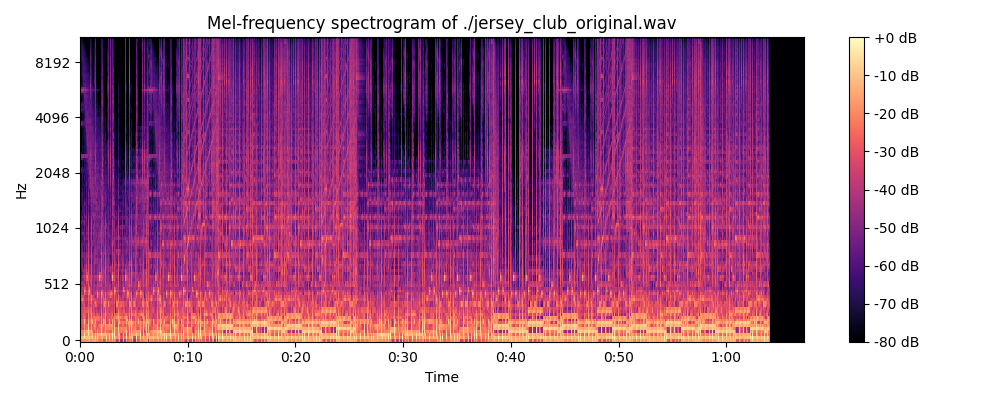

In [83]:
from IPython.display import Image as ColabImage
ColabImage(original_image_file_path)

In [84]:
watermarked_audio_file_path = "./jersey_club_watermarked.wav"
watermarked_image_file_path = mel_spectrum_image_of_audio(watermarked_audio_file_path)

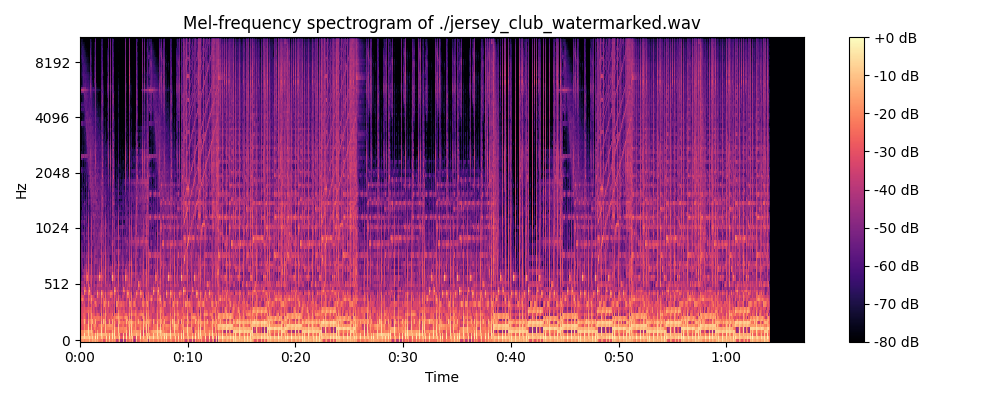

In [85]:
from IPython.display import Image as ColabImage
ColabImage(watermarked_image_file_path)